# Medical Insurance Prediction

In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
import requests
url = 'https://raw.githubusercontent.com/FinalYearMajorProject/Project/main/Datasets/Medical%20insurance%20dataset.csv'
res = requests.get(url, allow_redirects=True)
with open('insurance.csv','wb') as file:
    file.write(res.content)
ins = pd.read_csv('insurance.csv')

In [3]:
ins.head() # display the first 5 rows from the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.shape # check for the number of rows and columns

(1338, 7)

In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Preprocessing

In [6]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
ins.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:xlabel='charges', ylabel='Density'>

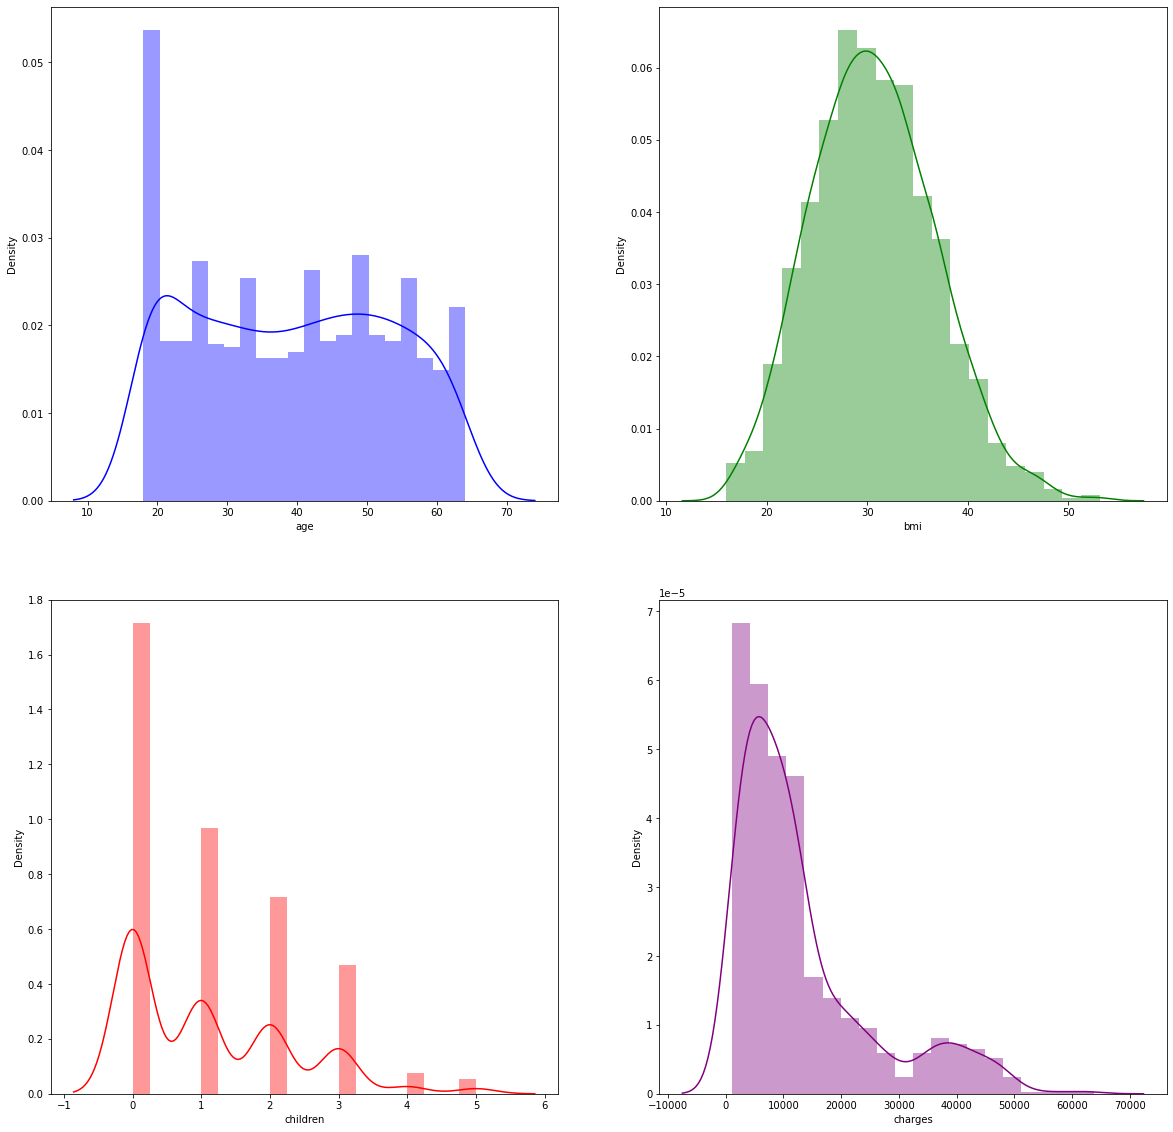

In [57]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
sns.distplot(ins.age, bins = 20, ax=ax[0,0], color="blue") 
sns.distplot(ins.bmi, bins = 20, ax=ax[0,1], color="green") 
sns.distplot(ins.children, bins = 20, ax=ax[1,0], color="red") 
sns.distplot(ins.charges, bins = 20, ax=ax[1,1], color="purple") 

In [9]:
ins.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [10]:
ins.duplicated().sum() # finding the total number of duplicate columns

1

In [11]:
ins.drop_duplicates(subset=None,keep='first',inplace=True) # dropped the duplicate rows by keeping the first occurence of the duplicate rows

In [12]:
ins.duplicated().sum() # checking for the number of duplicated rows again

0

In [13]:
# cheking for the number of rows and columns after removing duplicates
print(ins.shape[0])
print(ins.shape[1])

1337
7


In [14]:
ins.isnull().sum().sort_values(ascending=False) # sorting the "null" count values in the descending order

charges     0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0
dtype: int64

## Exploratory Data Analysis

In [15]:
ins.dtypes # checking the data types in-order to determine the categorical-value columns present in the dataset

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

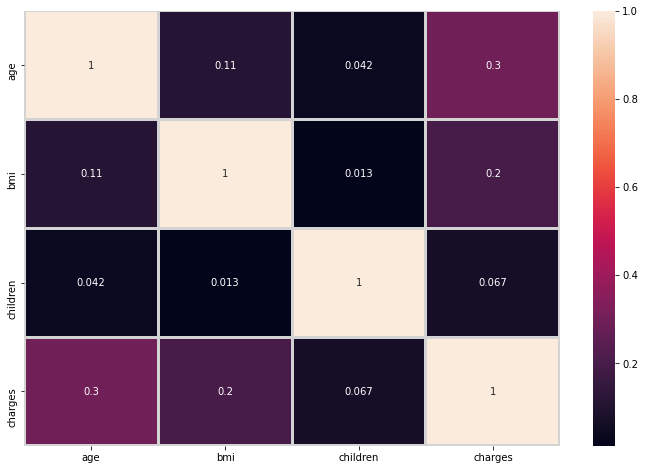

In [16]:
# heatmap of data

plt.figure(figsize = (12, 8))

sns.heatmap(ins.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='charges'>

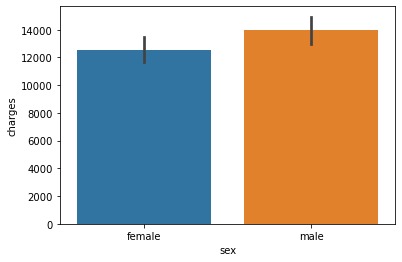

In [17]:
sns.barplot(x='sex',y='charges',data=ins)

<AxesSubplot:xlabel='children', ylabel='charges'>

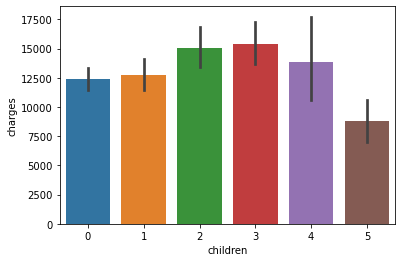

In [18]:
sns.barplot(x='children',y='charges',data=ins)

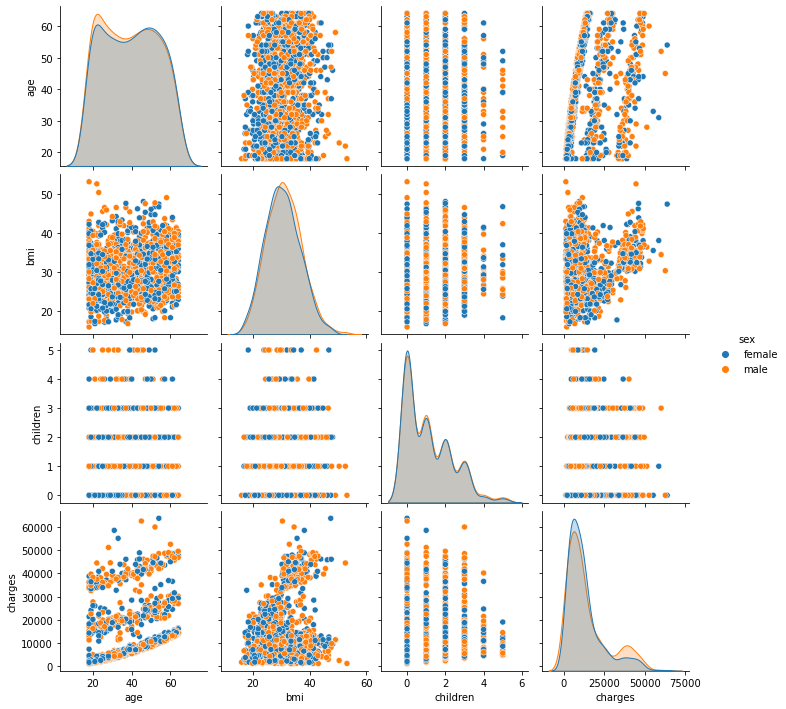

In [19]:
sns.pairplot(ins,hue='sex')

## Feature Engineering

In [20]:
ins[['sex','region']]

,sex,region
0,female,southwest
1,male,southeast
2,male,southeast
3,male,northwest
4,male,northwest
...,...,...
1333,male,northwest
1334,female,northeast
1335,female,southeast
1336,female,southwest


In [21]:
print(ins['sex'].unique())
print(ins['region'].unique())

['female' 'male']
['southwest' 'southeast' 'northwest' 'northeast']


In [22]:
ins['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [23]:
print(ins['region'].value_counts())

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


In [24]:
"""in this dataset the columns "region","smoker", and "sex" are containing categorical variables and it is important to 
encode these values so as to make it easier for the machine learning algorithm to understand these values properly."""

# for encoding, Label encoder is used for all the 3 columns

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(ins['smoker'])
ins['smoker_enc']=encoder.fit_transform(ins['smoker']) # encoding for column "smoker"

In [25]:
ins['sex_enc']=encoder.fit_transform(ins['sex']) # encoding for column "sex"
ins['region_enc']=encoder.fit_transform(ins['region']) # encoding for column "region"

In [26]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,smoker_enc,sex_enc,region_enc
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,3
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1


<AxesSubplot:xlabel='smoker_enc', ylabel='Density'>

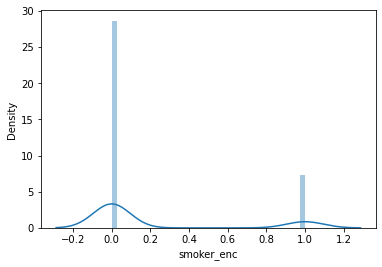

In [27]:
sns.distplot(ins['smoker_enc']) # distplot for the encoded column "smoker_enc"

<AxesSubplot:xlabel='sex_enc', ylabel='Density'>

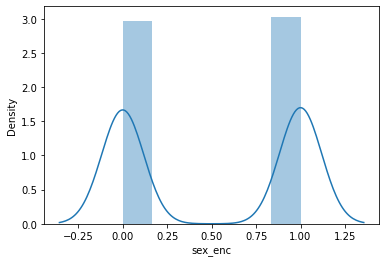

In [28]:
sns.distplot(ins['sex_enc']) # distplot for the encoded column "sex_enc"

<AxesSubplot:xlabel='region_enc', ylabel='Density'>

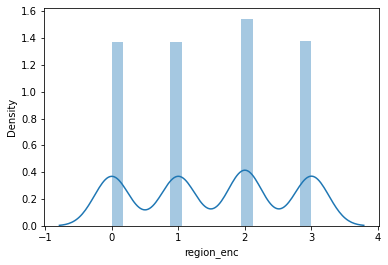

In [29]:
sns.distplot(ins['region_enc']) # distplot for the new encoded column "region_enc"

## Model Building 

In [30]:
X=ins.drop(['charges','smoker','region','sex'],axis=1)
X.head()

,age,bmi,children,smoker_enc,sex_enc,region_enc
0,19,27.900,0,1,0,3
1,18,33.770,1,0,1,2
2,28,33.000,3,0,1,2
3,33,22.705,0,0,1,1
4,32,28.880,0,0,1,1


In [58]:
X.dtypes

age             int64
bmi           float64
children        int64
smoker_enc      int32
sex_enc         int32
region_enc      int32
dtype: object

In [31]:
Y=ins['charges']
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [59]:
Y.dtypes

dtype('float64')

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [33]:
print("The number of rows and columns in X_train dataframe: ",X_train.shape)
print("The number of rows in y_train dataframe: ",Y_train.shape)
print("The number of rows and columns in X_test dataframe: ",X_test.shape)
print("The number of rows in y_test dataframe: ",Y_test.shape)

The number of rows and columns in X_train dataframe:  (935, 6)
The number of rows in y_train dataframe:  (935,)
The number of rows and columns in X_test dataframe:  (402, 6)
The number of rows in y_test dataframe:  (402,)


In [34]:
# for storing the names of the algorithms and their corresponding accuracy
Accuracy=[]
Algorithm = []

### Linear Regression 

In [35]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
predicted = regressor.predict(X_test)

In [36]:
Accuracy.append(regressor.score(X_test,Y_test)*100)

In [37]:
for i in Algorithm, Accuracy:
    print(i,end=',')

['LinearRegression'],[76.31717420685993],

### Support Vector Regression

In [38]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegression')
regressor_svr = SVR()
regressor_svr.fit(X_train, Y_train)
predicted_svr= regressor_svr.predict(X_test)

In [39]:
Accuracy.append(regressor_svr.score(X_test,Y_test)*100)

In [40]:
for i in Algorithm, Accuracy:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression'],[76.31717420685993, -10.99586795717249],

### Decision Tree Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegression')
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(X_train, Y_train)
predicted_tree= regressor_tree.predict(X_test)

In [42]:
Accuracy.append(regressor_tree.score(X_test,Y_test)*100)

In [43]:
for i in Algorithm, Accuracy:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegression'],[76.31717420685993, -10.99586795717249, 67.4629972165798],

### Random Forest Regression 

In [44]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegression')
regressor_forest = RandomForestRegressor()
regressor_forest.fit(X_train, Y_train)
predicted_forest= regressor_forest.predict(X_test)

In [45]:
Accuracy.append(regressor_forest.score(X_test,Y_test)*100)

In [46]:
for i in Algorithm, Accuracy:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegression', 'RandomForestRegression'],[76.31717420685993, -10.99586795717249, 67.4629972165798, 85.08265090628342],

In [47]:
df = pd.DataFrame({'Algorithm': Algorithm,'Accuracy':Accuracy}) 
df

,Algorithm,Accuracy
0,LinearRegression,76.317174
1,SupportVectorRegression,-10.995868
2,DecisionTreeRegression,67.462997
3,RandomForestRegression,85.082651


#### since Random Forest Regressor has the highest accuracy score so Random Forest Regressor is the best algorithm for this dataset

In [48]:
regressorfinal = RandomForestRegressor()
regressorfinal.fit(X_train, Y_train)
predictedfinal = regressorfinal.predict(X_test)

In [49]:
regressorfinal.score(X_train,Y_train)*100  # calculate the accuracy of train dataset

97.41768604428877

In [50]:
regressorfinal.score(X_test,Y_test)*100 # calculate the accuracy of test dataset

85.04738159408387

In [53]:
import pickle

In [55]:
model=RandomForestRegressor
pickle.dump(model,open('insurance_prediction','wb'))